In [3]:
import tensorflow as tf

In [19]:
from tensorflow.examples.tutorials.mnist import input_data

DATA_DIR = '/tmp/data'
NUM_STEPS = 1000
MINIBATCH_SIZE = 100

data = input_data.read_data_sets(DATA_DIR, one_hot=True)

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784,10]))

y_true = tf.placeholder(tf.float32, [None, 10])
y_pred = tf.matmul(x, W)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y_true))

gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for _ in range(NUM_STEPS):
        batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict={x: batch_xs, y_true: batch_ys})
        
    ans = sess.run(accuracy, feed_dict={x: data.test.images, y_true: data.test.labels})

print 'Accuracy: {:.4}%'.format(ans*100)  

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Accuracy: 91.6%


# Importing Images

Read more queues and threads here: https://blog.metaflow.fr/tensorflow-how-to-optimise-your-input-pipeline-with-queues-and-multi-threading-e7c3874157e0

This portion uploads all images in working directory into filename_queue  
Decodes the image data into RGB numbers  
Resizes the images to the same size  

Next: tf.train.batch?   
why does it only output one image rather than the two

['./Abudefduf_Abudefduf bengalensis_880932306.jpg'
 './Chrysiptera_Chrysiptera cyanea_-1721372500.jpg']
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>, assertion failed: [string_input_producer requires a non-null input tensor]
	 [[Node: input_producer_2/Assert/Assert = Assert[T=[DT_STRING], summarize=3, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input_producer_2/Greater, input_producer_2/Assert/Assert/data_0)]]


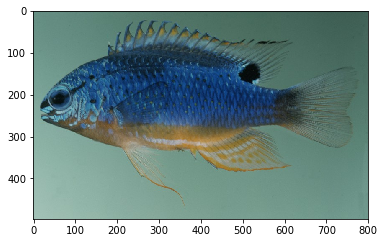

In [13]:
import matplotlib.pyplot as plt

directory = "*.jpg"
filenames = tf.train.match_filenames_once(directory)
filename_queue = tf.train.string_input_producer(filenames)
reader = tf.WholeFileReader()
filename, content = reader.read(filename_queue)
image = tf.image.decode_jpeg(content, channels=3)
image = tf.cast(image, tf.float32) / 255.0
resized_image = tf.image.resize_images(image, [256, 256])

image_batch = tf.train.batch([resized_image], batch_size=9)
init = (tf.global_variables_initializer(), tf.local_variables_initializer())

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(filenames))
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    plt.imshow(image.eval())
    plt.show()
    
    #coord.request_stop()
    #coord.join(threads)
    